## **Simple Linear Regression**

Imagine you have a friend, Alex, who collects stamps. Every month, Alex buys a certain number of stamps, and you notice that the amount Alex spends seems to depend on the number of stamps bought.  

Now, you want to create a little tool that can predict how much Alex will spend next month based on the number of stamps bought. This is where Linear Regression comes into play.  

In technical terms, we're trying to predict the dependent variable (amount spent) based on the independent variable (number of stamps bought).  

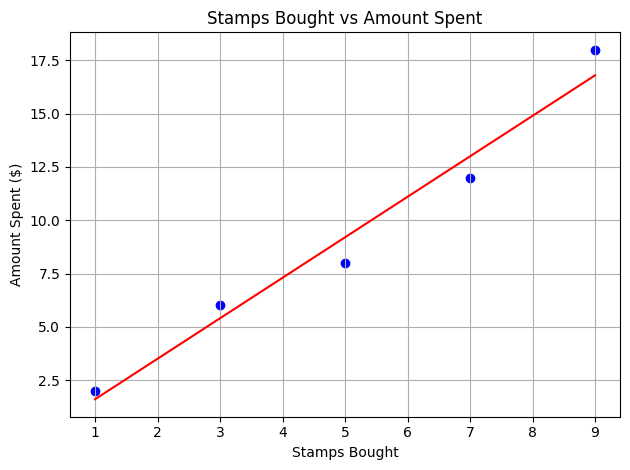

If Alex buys 10 stamps next month, they will likely spend $18.70.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample Data
stamps_bought = np.array([1, 3, 5, 7, 9]).reshape((-1, 1))  # Reshaping to make it a 2D array
amount_spent = np.array([2, 6, 8, 12, 18])

# Creating a Linear Regression Model
model = LinearRegression()

# Training the Model
model.fit(stamps_bought, amount_spent)

# Predictions
next_month_stamps = 10
predicted_spend = model.predict([[next_month_stamps]])

# Plotting
plt.scatter(stamps_bought, amount_spent, color='blue')
plt.plot(stamps_bought, model.predict(stamps_bought), color='red')
plt.title('Stamps Bought vs Amount Spent')
plt.xlabel('Stamps Bought')
plt.ylabel('Amount Spent ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaying Prediction
print(f"If Alex buys {next_month_stamps} stamps next month, they will likely spend ${predicted_spend[0]:.2f}.")


## **Logistic Regression**

Jenny is an avid book reader. Jenny reads books of different genres and maintains a little journal where she notes down the number of pages and whether she liked the book (Yes or No).  

We see a pattern: Jenny typically enjoys books that are neither too short nor too long. Now, can we predict whether Jenny will like a book based on its number of pages? This is where Logistic Regression can help us!  

In technical terms, we're trying to predict a binary outcome (like/dislike) based on one independent variable (number of pages).  

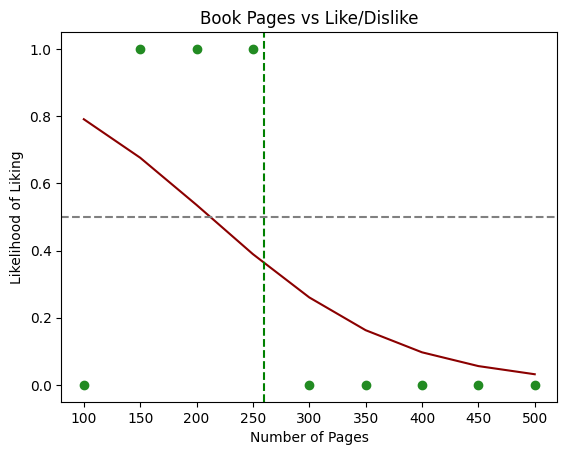

Jenny will not like a book of 260 pages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Sample Data
pages = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500]).reshape(-1, 1)
likes = np.array([0, 1, 1, 1, 0, 0, 0, 0, 0])  # 1: Like, 0: Dislike

# Creating a Logistic Regression Model
model = LogisticRegression()

# Training the Model
model.fit(pages, likes)

# Predictions
predict_book_pages = 260
predicted_like = model.predict([[predict_book_pages]])

# Plotting
plt.scatter(pages, likes, color='forestgreen')
plt.plot(pages, model.predict_proba(pages)[:, 1], color='darkred')
plt.title('Book Pages vs Like/Dislike')
plt.xlabel('Number of Pages')
plt.ylabel('Likelihood of Liking')
plt.axvline(x=predict_book_pages, color='green', linestyle='--')
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.show()

# Displaying Prediction
print(f"Jenny will {'like' if predicted_like[0] == 1 else 'not like'} a book of {predict_book_pages} pages.")


## **Linear Discriminant Analysis (LDA)**

Imagine Sarah, who loves cooking and trying various fruits. She sees that the fruits she likes are typically of specific sizes and sweetness levels.  

Now, Sarah is curious: can she predict whether she will like a fruit based on its size and sweetness? Let's use Linear Discriminant Analysis (LDA) to help her predict whether she'll like certain fruits or not.  

In technical language, we are trying to classify the fruits (like/dislike) based on two predictor variables (size and sweetness).  

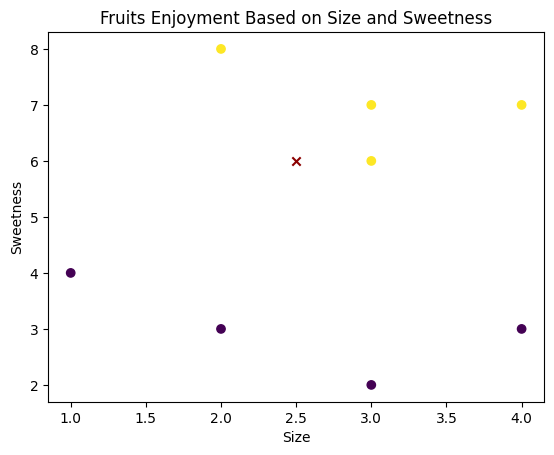

Sarah will like a fruit of size 2.5 and sweetness 6.0.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Sample Data
# [size, sweetness]
fruits_features = np.array([[3, 7], [2, 8], [3, 6], [4, 7], [1, 4], [2, 3], [3, 2], [4, 3]])
fruits_likes = np.array([1, 1, 1, 1, 0, 0, 0, 0])  # 1: Like, 0: Dislike

# Creating an LDA Model
model = LinearDiscriminantAnalysis()

# Training the Model
model.fit(fruits_features, fruits_likes)

# Prediction
new_fruit = np.array([[2.5, 6]])  # [size, sweetness]
predicted_like = model.predict(new_fruit)

# Plotting
plt.scatter(fruits_features[:, 0], fruits_features[:, 1], c=fruits_likes, cmap='viridis', marker='o')
plt.scatter(new_fruit[:, 0], new_fruit[:, 1], color='darkred', marker='x')
plt.title('Fruits Enjoyment Based on Size and Sweetness')
plt.xlabel('Size')
plt.ylabel('Sweetness')
plt.show()

# Displaying Prediction
print(f"Sarah will {'like' if predicted_like[0] == 1 else 'not like'} a fruit of size {new_fruit[0, 0]} and sweetness {new_fruit[0, 1]}.")


In [4]:
predicted_like[0]

np.int64(1)

## **LDA vs Logistic Regression**

Logistic regression is a popular approach for performing classification when there are two classes.  

But when the classes are well-separated or the number of classes exceeds 2, the parameter estimates for the logistic regression model are surprisingly unstable.  

LDA does not suffer from this instability problem when the number of classes is more than 2.  

## **Naive Bayes**

The idea behind this method is to calculate the probability of observation belonging to a class given the prior probability for that class and conditional probability of each feature value given for given class.  

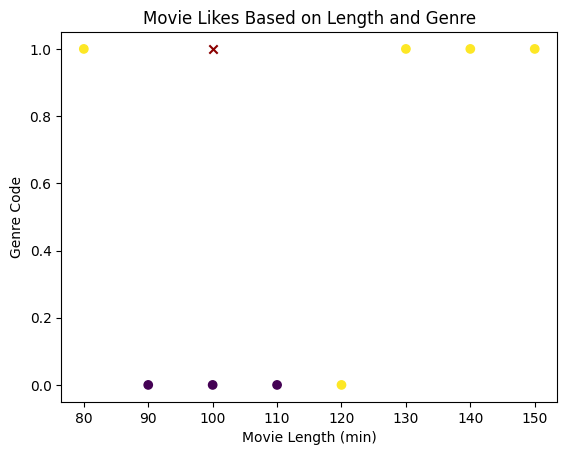

Tom will like a 100-min long movie of genre code 1.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Sample Data
# [movie_length, genre_code] (assuming genre is coded as: 0 for Action, 1 for Romance, etc.)
movies_features = np.array([[120, 0], [150, 1], [90, 0], [140, 1], [100, 0], [80, 1], [110, 0], [130, 1]])
movies_likes = np.array([1, 1, 0, 1, 0, 1, 0, 1])  # 1: Like, 0: Dislike

# Creating a Naive Bayes Model
model = GaussianNB()

# Training the Model
model.fit(movies_features, movies_likes)

# Prediction
new_movie = np.array([[100, 1]])  # [movie_length, genre_code]
predicted_like = model.predict(new_movie)

# Plotting
plt.scatter(movies_features[:, 0], movies_features[:, 1], c=movies_likes, cmap='viridis', marker='o')
plt.scatter(new_movie[:, 0], new_movie[:, 1], color='darkred', marker='x')
plt.title('Movie Likes Based on Length and Genre')
plt.xlabel('Movie Length (min)')
plt.ylabel('Genre Code')
plt.show()

# Displaying Prediction
print(f"Tom will {'like' if predicted_like[0] == 1 else 'not like'} a {new_movie[0, 0]}-min long movie of genre code {new_movie[0, 1]}.")

## **Decision Trees**

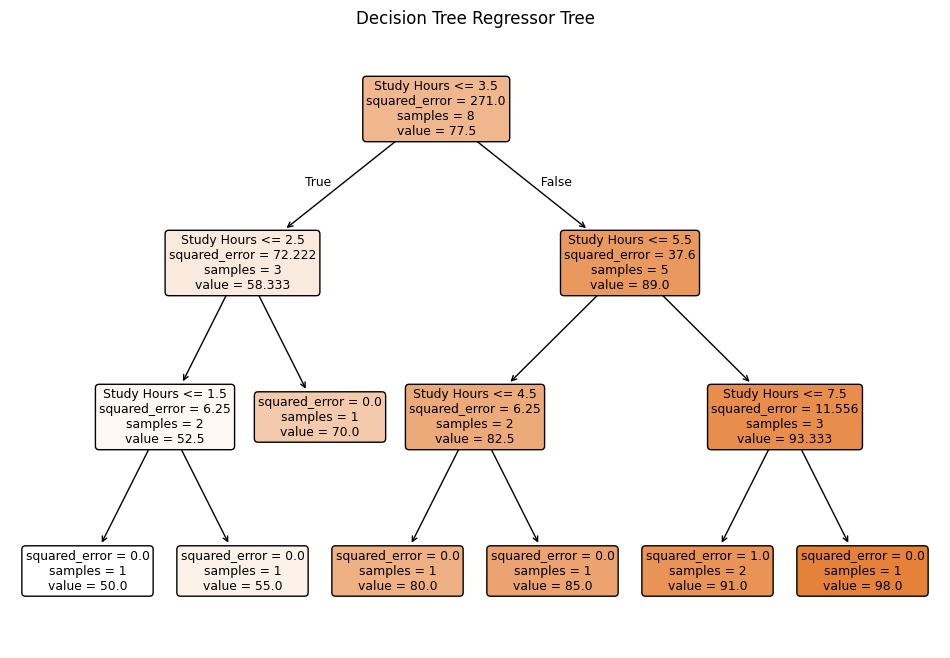

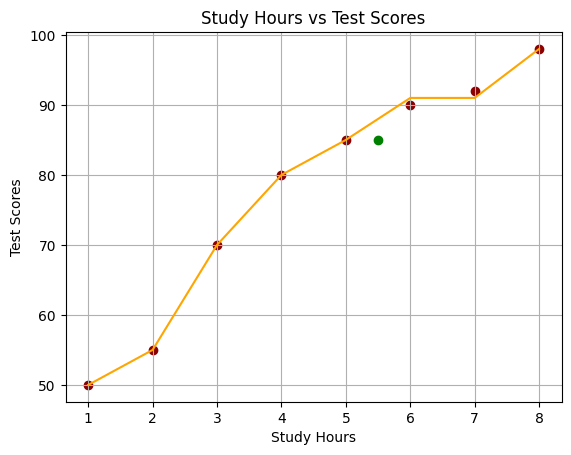

Predicted test score for 5.5 hours of study: 85.00.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Sample Data
# [hours_studied]
study_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
test_scores = np.array([50, 55, 70, 80, 85, 90, 92, 98])

# Creating a Decision Tree Regression Model
model = DecisionTreeRegressor(max_depth=3)

# Training the Model
model.fit(study_hours, test_scores)

# Prediction
new_study_hour = np.array([[5.5]])  # example of hours studied
predicted_score = model.predict(new_study_hour)

# Plotting the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, rounded=True, feature_names=["Study Hours"])
plt.title('Decision Tree Regressor Tree')
plt.show()

# Plotting Study Hours vs. Test Scores
plt.scatter(study_hours, test_scores, color='darkred')
plt.plot(np.sort(study_hours, axis=0), model.predict(np.sort(study_hours, axis=0)), color='orange')
plt.scatter(new_study_hour, predicted_score, color='green')
plt.title('Study Hours vs Test Scores')
plt.xlabel('Study Hours')
plt.ylabel('Test Scores')
plt.grid(True)
plt.show()

# Displaying Prediction
print(f"Predicted test score for {new_study_hour[0, 0]} hours of study: {predicted_score[0]:.2f}.")
